In [9]:
import pandas as pd
import numpy as np
from scipy import stats, special

from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization, advanced_activations
from keras.optimizers import RMSprop, SGD, Adadelta, Adagrad
from keras import backend as K
from keras.regularizers import WeightRegularizer, l1, l2, activity_l2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw = pd.DataFrame.from_csv('data/pseudomonas.tsv', sep='\t').transpose()

In [3]:
y = np.array(raw)
for i in range(raw.shape[0]):
    y[i,:] = y[i,:] / np.sum(y[i,:])
x = preprocessing.scale(y)

In [54]:
ae = Sequential()
ae.add(Dense(50, input_dim=x.shape[1], W_regularizer=l2(.0000001), activity_regularizer=activity_l2(.000001)))
ae.add(Activation('relu'))
ae.add(Dense(x.shape[1], W_regularizer=l1(.000001)))
ae.add(Activation('softmax'))
ae.compile(optimizer=Adagrad(), loss='categorical_crossentropy')
ae.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_15 (Dense)                   (None, 50)          277500      dense_input_8[0][0]              
____________________________________________________________________________________________________
activation_15 (Activation)         (None, 50)          0           dense_15[0][0]                   
____________________________________________________________________________________________________
dense_16 (Dense)                   (None, 5549)        282999      activation_15[0][0]              
____________________________________________________________________________________________________
activation_16 (Activation)         (None, 5549)        0           dense_16[0][0]                   
Total params: 560499
______________________________________________________________________

In [55]:
history = ae.fit(x, y, batch_size=64, nb_epoch=200, verbose=1, validation_split = 0)
plt.scatter(np.arange(len(np.array(history.history["val_loss"]))), 
            y.shape[0] * (np.array(history.history["val_loss"]) - 8.60414056774551))

Epoch 1/200
950/950 [==============================] - 0s - loss: 8.6273     
Epoch 2/200
950/950 [==============================] - 0s - loss: 8.6210     
Epoch 3/200
950/950 [==============================] - 0s - loss: 8.6182     
Epoch 4/200
950/950 [==============================] - 0s - loss: 8.6175     
Epoch 5/200
950/950 [==============================] - 0s - loss: 8.6177     
Epoch 6/200
950/950 [==============================] - 0s - loss: 8.6165     
Epoch 7/200
950/950 [==============================] - 0s - loss: 8.6168     
Epoch 8/200
950/950 [==============================] - 0s - loss: 8.6152     
Epoch 9/200
950/950 [==============================] - 0s - loss: 8.6155     
Epoch 10/200
950/950 [==============================] - 0s - loss: 8.6151     
Epoch 11/200
950/950 [==============================] - 0s - loss: 8.6147     
Epoch 12/200
950/950 [==============================] - 0s - loss: 8.6139     
Epoch 13/200
950/950 [==============================] - 0s - 

KeyError: 'val_loss'

<matplotlib.colorbar.Colorbar instance at 0x138cbeb48>

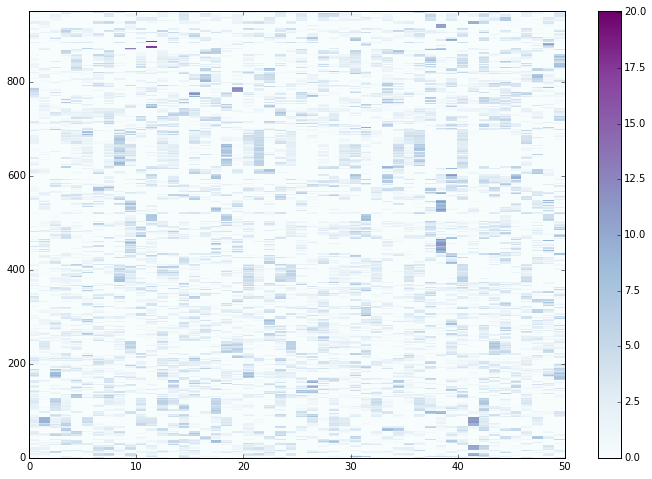

In [81]:
import palettable as pal
cmap=pal.colorbrewer.sequential.BuPu_8.get_mpl_colormap()

get_code = K.function([ae.layers[0].input], [ae.layers[1].output])
code = get_code([x])[0]
df=pd.DataFrame(code)

fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
h=ax.pcolor(df, cmap=cmap)
ax.margins(0,0)
fig.colorbar(h)

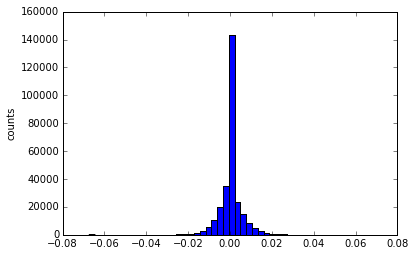

In [75]:
weights = ae.get_weights()[2].flatten()
plt.hist(weights, normed=False, bins=50)
plt.ylabel('counts');

<matplotlib.colorbar.Colorbar instance at 0x155335fc8>

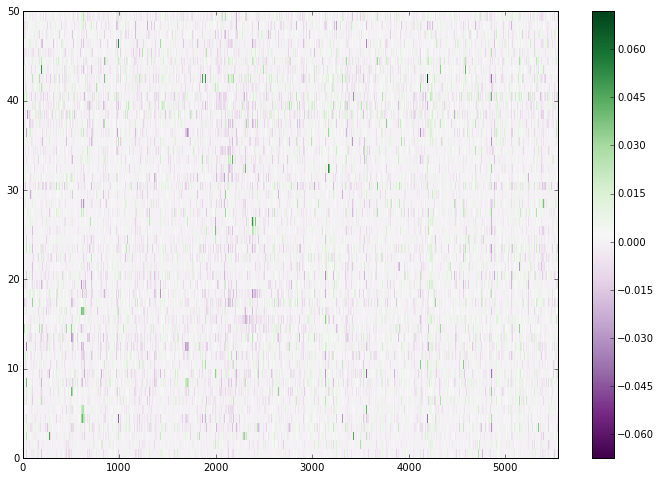

In [71]:
import palettable as pal
cmap=pal.colorbrewer.diverging.PRGn_11.get_mpl_colormap()

df=pd.DataFrame(ae.get_weights()[2])

fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
h=ax.pcolor(df, cmap=cmap)
ax.margins(0,0)
fig.colorbar(h)

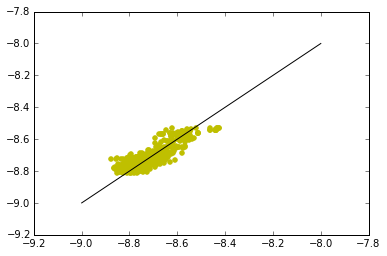

In [80]:
get_outputs = K.function([ae.layers[0].input], [ae.layers[3].output])
outputs = get_outputs([x])[0]
#pd.DataFrame(code).describe()
i = i-10
plt.scatter(special.logit(y[:,i]), special.logit(outputs[:,i]), color = "y")
plt.plot([-9,-8], [-9,-8],color='k', linestyle='-', linewidth=1)

In [119]:
pd.DataFrame(ae.get_weights()[2]).to_csv("ae_weights.csv")

In [ ]:
pd.DataFrame(codes).to_csv("ae_codes.csv")